In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy

from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns
from sklearn.decomposition import PCA

from google.colab import drive
drive.mount('/content/drive')

from tqdm.notebook import tqdm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Mounted at /content/drive


# Import Data

In [ ]:
data = pd.read_csv('drive/MyDrive/COGS_Project/all_data.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (23,39,41,43,50,66,68,70,77,93,95,97,104,120,122,124,131,147,149,151,158,174,176,178,185,201,203,205,212,228,230,232,239,255,257,259,266,282,284,286,293,309,311,313,320,336,338,340,347,363,365,367,374,390,392,394,401,417,419,421,428,444,446,448,455,471,473,475,482,498,500,502,509,525,527,529,536,552,554,556,563,579,581,583,590,606,608,610,617,633,635,637,644,660,662,664,671,687,689,691,698,714,716,718,725,741,743,745,752,768,770,772,779,795,797,799,806,822,824,826,833,849,851,853,860,876,878,880,887,903,905,907,914,930,932,934,957,959,961,968,984,986,988,995,1011,1013,1015,1022,1038,1040,1042,1049,1065,1067,1069,1076,1092,1094,1096,1103,1119,1121,1123,1130,1146,1148,1150,1157,1173,1175,1177,1184,1200,1202,1204,1211,1227,1229,1231,1238,1254,1256,1258,1265,1281,1283,1285,1292,1308,1310,1312,1319,1335,1337,1339,1346,1362,1364,1366,1373,1389,1391,1393,1400,1416,1418,1420,1427,1443,1445,1447,

In [ ]:
data = data.set_index('Unnamed: 0')
data.index.name = 'Date'

In [ ]:
data_floats = data.select_dtypes(include='float')

In [ ]:
data_floats

,ZR=F_Open,ZR=F_High,ZR=F_Low,ZR=F_Close,ZR=F_Adj_Close,ZR=F_Volume,CL=F_Open,CL=F_High,CL=F_Low,CL=F_Close,CL=F_Adj_Close,CL=F_Volume,ZW=F_Open,ZW=F_High,ZW=F_Low,ZW=F_Close,ZW=F_Adj_Close,ZW=F_Volume,59211099999_STATION,59211099999.0_LATITUDE,59211099999.0_LONGITUDE,59211099999.0_ELEVATION,59211099999.0_TEMP,59211099999.0_TEMP_ATTRIBUTES,59211099999.0_DEWP,59211099999.0_DEWP_ATTRIBUTES,59211099999.0_SLP,59211099999.0_SLP_ATTRIBUTES,59211099999.0_STP,59211099999.0_STP_ATTRIBUTES,59211099999.0_VISIB,59211099999.0_VISIB_ATTRIBUTES,59211099999.0_WDSP,59211099999.0_WDSP_ATTRIBUTES,59211099999.0_MXSPD,59211099999.0_GUST,59211099999.0_MAX,59211099999.0_MIN,59211099999.0_PRCP,59211099999.0_SNDP,...,47818099999.0_DEWP.1,47818099999.0_DEWP_ATTRIBUTES.1,47818099999.0_SLP.1,47818099999.0_SLP_ATTRIBUTES.1,47818099999.0_STP.1,47818099999.0_STP_ATTRIBUTES.1,47818099999.0_VISIB.1,47818099999.0_VISIB_ATTRIBUTES.1,47818099999.0_WDSP.1,47818099999.0_WDSP_ATTRIBUTES.1,47818099999.0_MXSPD.1,47818099999.0_GUST.1,47818099999.0_MAX.1,47818099999.0_MIN.1,47818099999.0_PRCP.1,47818099999.0_SNDP.1,47818099999.0_FRSHTT.1,47912099999_STATION,47912099999.0_LATITUDE,47912099999.0_LONGITUDE,47912099999.0_ELEVATION,47912099999.0_TEMP,47912099999.0_TEMP_ATTRIBUTES,47912099999.0_DEWP,47912099999.0_DEWP_ATTRIBUTES,47912099999.0_SLP,47912099999.0_SLP_ATTRIBUTES,47912099999.0_STP,47912099999.0_STP_ATTRIBUTES,47912099999.0_VISIB,47912099999.0_VISIB_ATTRIBUTES,47912099999.0_WDSP,47912099999.0_WDSP_ATTRIBUTES,47912099999.0_MXSPD,47912099999.0_GUST,47912099999.0_MAX,47912099999.0_MIN,47912099999.0_PRCP,47912099999.0_SNDP,47912099999.0_FRSHTT
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2007-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.921110e+10,23.9,106.6,177.0,58.9,8.0,54.8,8.0,1016.8,8.0,996.0,4.0,1.6,8.0,1.7,8.0,1.9,999.9,61.9,55.9,0.00,999.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-02,1013.0,1013.0,1013.0,1013.0,1013.0,5.0,60.98,61.55,60.41,61.05,61.05,41686.0,NaN,NaN,NaN,NaN,NaN,NaN,5.921110e+10,23.9,106.6,177.0,61.0,8.0,56.5,8.0,1014.8,8.0,993.8,4.0,3.6,8.0,4.1,8.0,7.8,999.9,66.4,55.2,0.00,999.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-03,1016.0,1016.0,1016.0,1016.0,1016.0,10.0,60.95,60.97,57.72,58.32,58.32,248547.0,493.0,493.75,476.25,476.50,476.50,22414.0,5.921110e+10,23.9,106.6,177.0,53.7,8.0,46.7,8.0,1021.1,8.0,999.5,4.0,13.1,8.0,2.7,8.0,3.9,999.9,57.9,48.9,0.01,999.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-04,1018.0,1018.0,1018.0,1018.0,1018.0,14.0,58.35,58.58,55.39,55.59,55.59,324010.0,478.0,479.75,464.50,467.50,467.50,15557.0,5.921110e+10,23.9,106.6,177.0,51.4,8.0,46.2,8.0,1025.3,8.0,3.8,4.0,6.0,8.0,2.2,8.0,3.9,999.9,55.0,47.1,0.06,999.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-05,1020.0,1021.0,1019.5,1021.0,1021.0,32.0,55.41,56.40,54.90,56.31,56.31,250130.0,469.0,470.75,462.00,470.25,470.25,19820.0,5.921110e+10,23.9,106.6,177.0,54.8,8.0,40.0,8.0,1027.4,8.0,5.9,4.0,10.5,8.0,2.7,8.0,5.8,999.9,60.4,49.5,0.00,999.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

# First 100 Column Distributions


[]

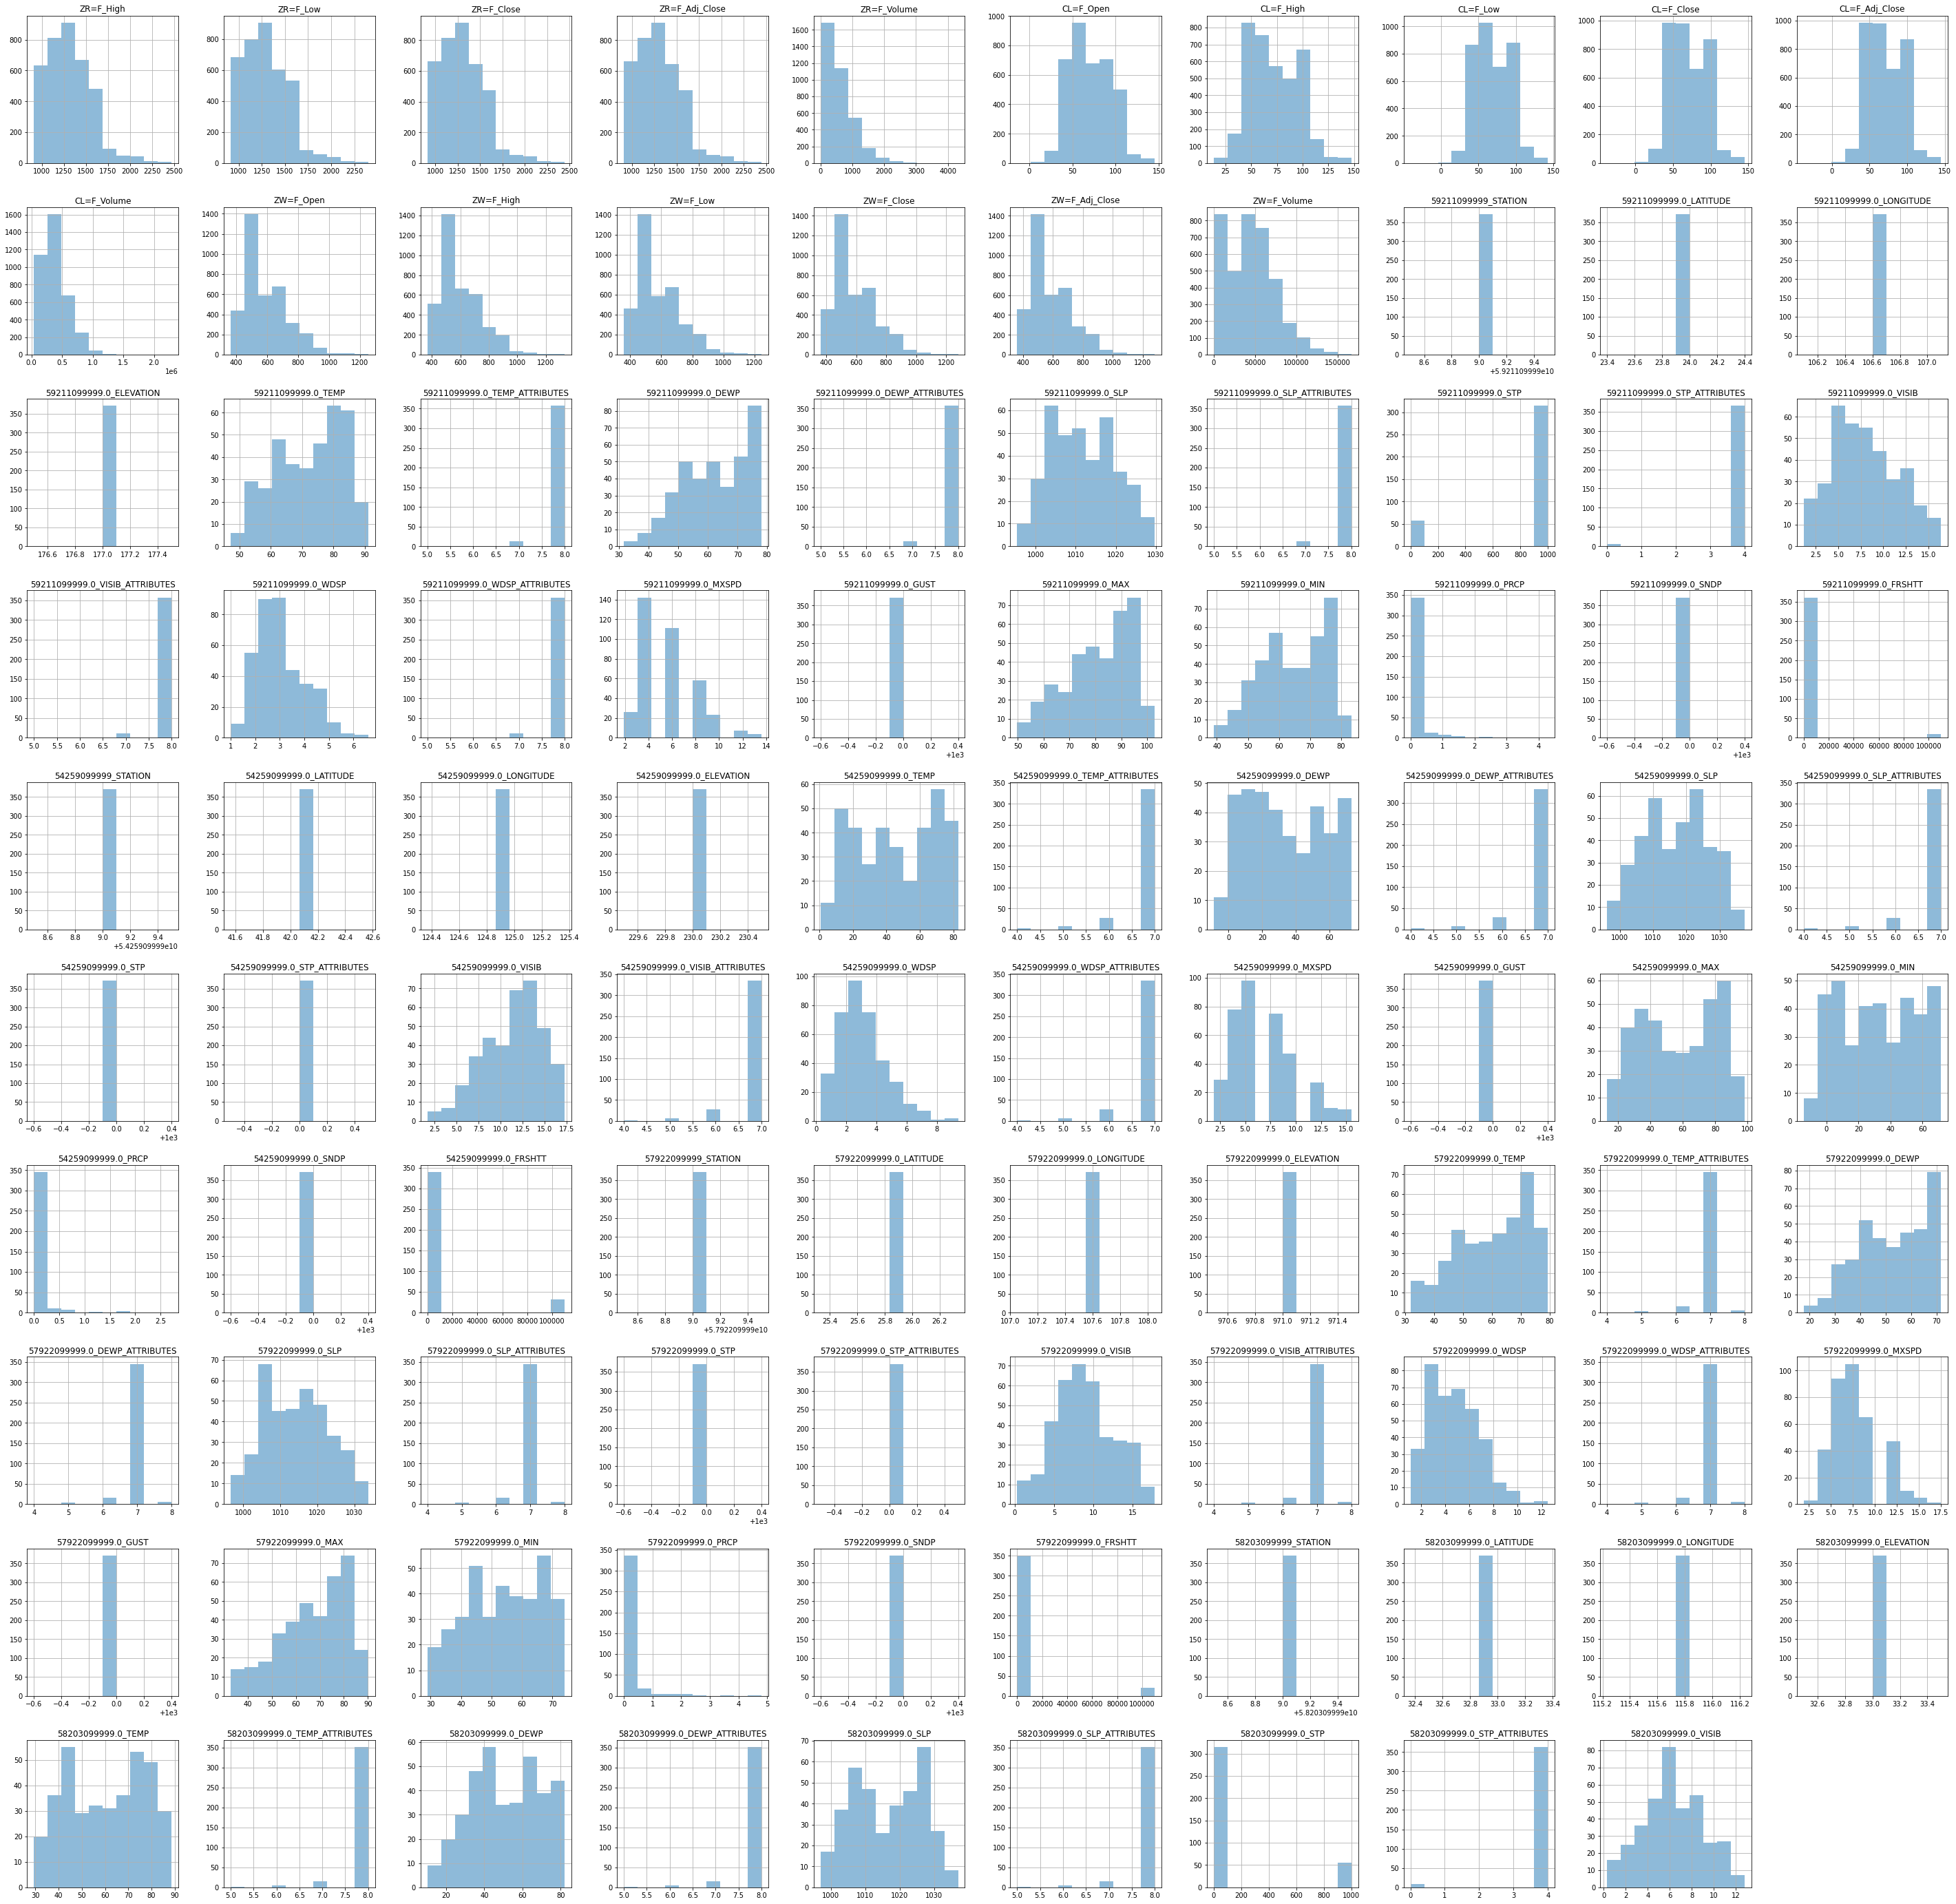

In [ ]:
data_floats.take(np.arange(1,100,1), axis=1).hist(alpha=0.5,figsize=(50,50))
plt.plot()

# Linear Correlation 

## Regression Plots for Financial Data


Rice Price to Crude Oil

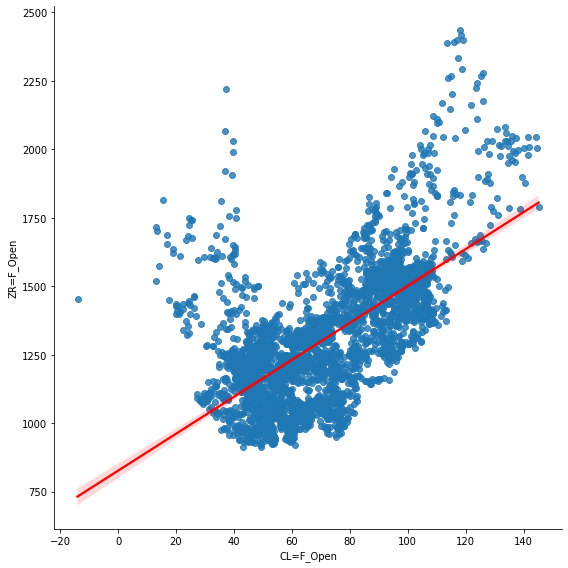

In [ ]:
sns.lmplot(x='CL=F_Open', y='ZR=F_Open',data=data, fit_reg=True, line_kws={'color': 'red'}, height=8)
plt.show()

Rice Price to Wheat

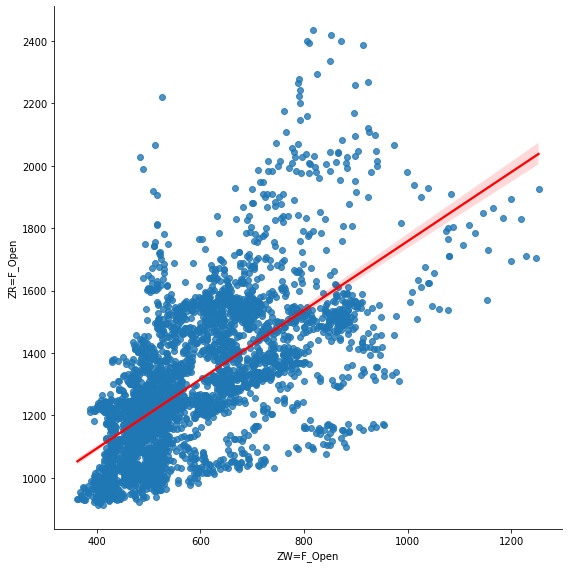

In [ ]:
sns.lmplot(x='ZW=F_Open',y='ZR=F_Open',data=data,fit_reg=True, line_kws={'color': 'red'}, height=8)
plt.show()

##Regression Plots for Weather

### Weather Data Variable Sheet

found at: https://www.ncei.noaa.gov/data/global-summary-of-the-day/doc/readme.txt

STATION - Station number (WMO/DATSAV3 possibly combined w/WBAN number) 

DATE - Given in mm/dd/yyyy format

LATITUDE - Given in decimated degrees (Southern Hemisphere values are negative)

LONGITUDE - Given in decimated degrees (Western Hemisphere values are negative)

ELEVATION - Given in meters

NAME - Name of station/airport/military base

TEMP - Mean temperature for the day in degrees Fahrenheit to tenths. Missing = 9999.9 

**TEMP_ATTRIBUTES - Number of observations used in calculating mean temperature.**

DEWP - Mean dew point for the day in degrees Fahrenheit to tenths. Missing = 9999.9

DEWP_ATTRIBUTES - Number of observations used in calculating mean dew point.  

SLP - Mean sea level pressure for the day in millibars to tenths. Missing = 9999.9

SLP_ATTRIBUTES - Number of observations used in calculating mean sea level pressure.

STP - Mean station pressure for the day in millibars to tenths. Missing = 9999.9

STP_ATTRIBUTES - Number of observations used in calculating mean station pressure. 

VISIB - Mean visibility for the day in miles to tenths. Missing = 999.9

VISIB_ATTRIBUTES - Number of observations used in calculating mean visibility.      

WDSP - Mean wind speed for the day in knots to tenths.  Missing = 999.9 

WDSP_ATTRIBUTES - Number of observations used in calculating mean windspeed.

MXSPD - Maximum sustained wind speed reported for the day in knots to tenths. Missing = 999.9

GUST - Maximum wind gust reported for the day in knots to tenths.  Missing = 999.9

MAX - Maximum temperature reported during the day in Fahrenheit to tenths. Missing = 9999.9

Note: Time of maximum temperature report varies by country and region, so this will sometimes 
not be the maximum for the calendar day.    

MAX_ATTRIBUTES – 
Blank indicates maximum temperature was taken from the explicit maximum 
temperature report and not from the 'hourly' data.  
                    
       * indicates maximum temperature was derived from the hourly data
(i.e. highest hourly or synoptic-reported temperature).

MIN - Minimum temperature reported during the day in Fahrenheit to tenths. Missing = 9999.9

Note: Time of minimum temperature report varies by country and region, so this will sometimes 
not be the maximum for the calendar day.

MIN_ATTRIBUTES    
Blank indicates minimum temperature was taken from the explicit minimum 
temperature report and not from the 'hourly' data.  
                    
       * indicates minimum temperature was derived from the hourly data
(i.e. highest hourly or synoptic-reported temperature).

PRCP - Total precipitation (rain and/or melted snow) reported during the day in inches and hundredths; will usually not end with the midnight observatio (i.e. may include latter part of previous day). “0” indicates no measurable precipitation (includes a trace). Missing = 99.99
                         
Note: Many stations do not report “0” on days with no precipitation, therefore “99.99” will often 
appear on these days. Also, for example, a station may only report a 6-hour amount for the 
period during which rain fell. See attribute field for source of data.

PRCP_ATTRIBUTES -
* A = 1 report of 6-hour precipitation amount.
* B = Summation of 2 reports of 6-hour precipitation amount.
*C = Summation of 3 reports of 6-hour precipitation amount.
*D = Summation of 4 reports of 6-hour precipitation amount.
*E = 1 report of 12-hour precipitation amount.
*F = Summation of 2 reports of 12-hour precipitation amount.
*G = 1 report of 24-hour precipitation amount.
*H = Station reported '0' as the amount for the day (eg, from 6-hour reports), but also reported at least one occurrence of precipitation in hourly observations. This could indicate a trace occurred, but should be considered as incomplete data for the day.
*I = Station did not report any precipitation data for the day and did not report any occurrences of precipitation in its hourly observations. It's still possible that precipitation occurred but was not reported.

SNDP - Snow depth in inches to tenths. It is the last report for the day if reported more than
                         once. Missing = 999.9
                         
Note: Most stations do not report “0” on days with no snow on the ground, therefore, “999.9” will 
often appear on these days.

FRSHTT - Indicators (1 = yes, 0 = no/not reported) for the occurrence during the day of:
                         Fog ('F' - 1st digit).
                         Rain or Drizzle ('R' - 2nd digit).
                         Snow or Ice Pellets ('S' - 3rd digit).
                         Hail ('H' - 4th digit).
                         Thunder ('T' - 5th digit).
                         Tornado or Funnel Cloud ('T' - 6th digit).

### Getting Columns

In [ ]:
data_cols = pd.DataFrame().assign(cols = data_floats.columns)
temperature_cols = data_cols[(data_cols['cols'].apply((lambda x: 'TEMP' in x[-5:])))]['cols'].to_numpy()

In [ ]:
all_temperature_average = data_floats[temperature_cols].mean(axis=1)

In [ ]:
dew_point_cols = data_cols[(data_cols['cols'].apply((lambda x: 'DEWP' in x[-5:])))]['cols'].to_numpy()
mean_sea_level_pressure_cols = data_cols[(data_cols['cols'].apply((lambda x: 'SLP' in x[-5:])))]['cols'].to_numpy()
mean_visibility_cols = data_cols[(data_cols['cols'].apply((lambda x: 'VISIB' in x[-5:])))]['cols'].to_numpy()
mean_wind_speed_cols = data_cols[(data_cols['cols'].apply((lambda x: 'WDSP' in x[-5:])))]['cols'].to_numpy()
max_wind_speed_cols = data_cols[(data_cols['cols'].apply((lambda x: 'MXSPD' in x[-5:])))]['cols'].to_numpy()
max_temp_cols = data_cols[(data_cols['cols'].apply((lambda x: 'MAX' in x[-5:])))]['cols'].to_numpy()
min_temp_cols = data_cols[(data_cols['cols'].apply((lambda x: 'MIN' in x[-5:])))]['cols'].to_numpy()
precipitation_cols = data_cols[(data_cols['cols'].apply((lambda x: 'PRCP' in x[-5:])))]['cols'].to_numpy()
snow_depth_cols = data_cols[(data_cols['cols'].apply((lambda x: 'SNDP' in x[-5:])))]['cols'].to_numpy()

Checking data coverage 

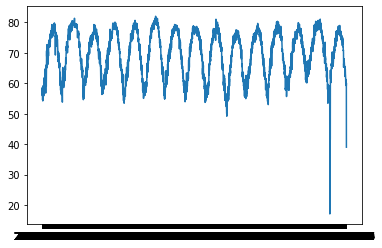

In [ ]:
plt.plot(all_temperature_average)

### Visual

####First n Weather Stations Temperature

  0%|          | 0/20 [00:00<?, ?it/s]

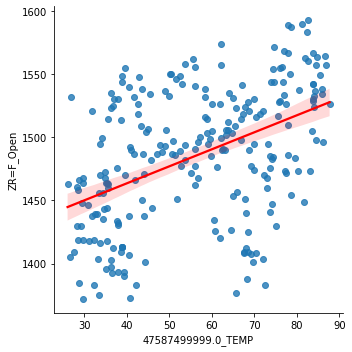

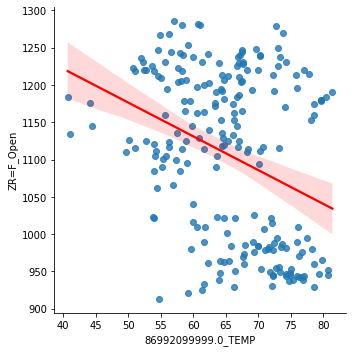

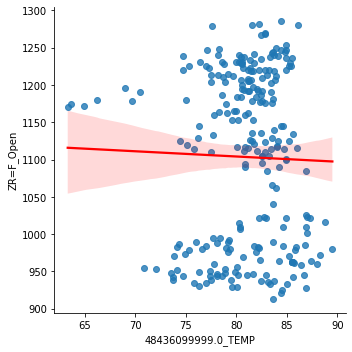

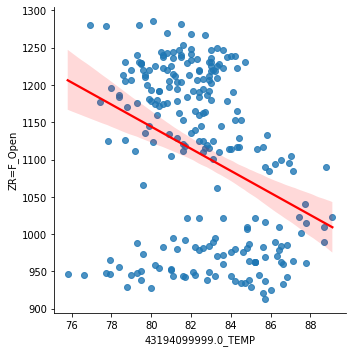

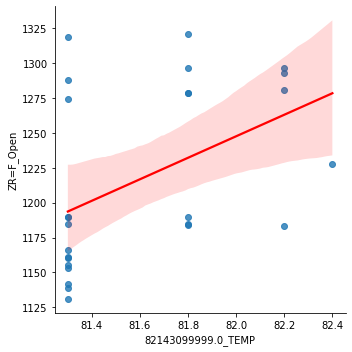

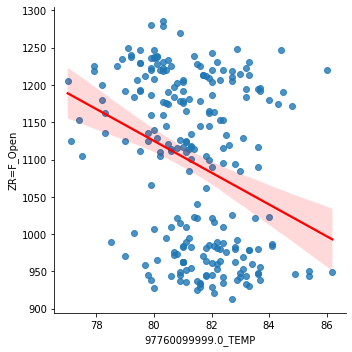

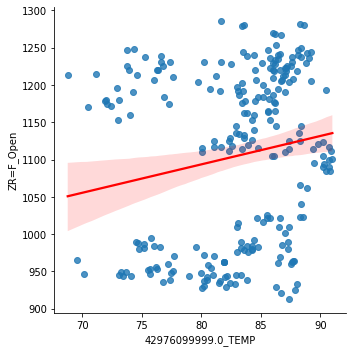

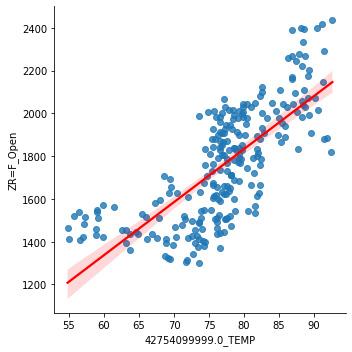

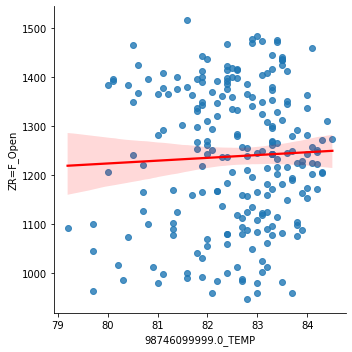

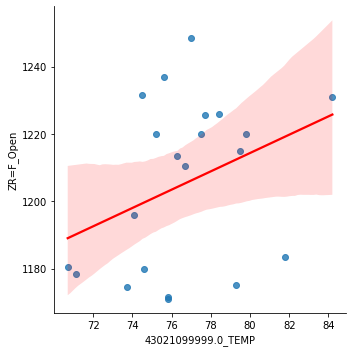

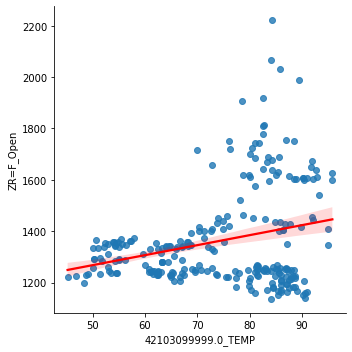

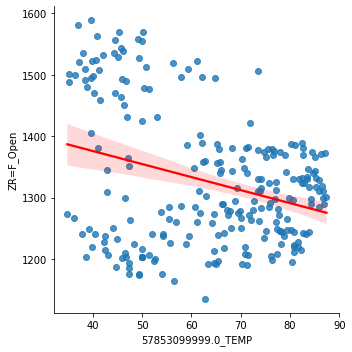

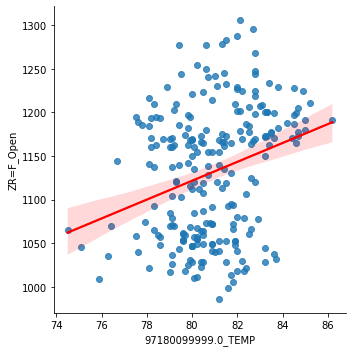

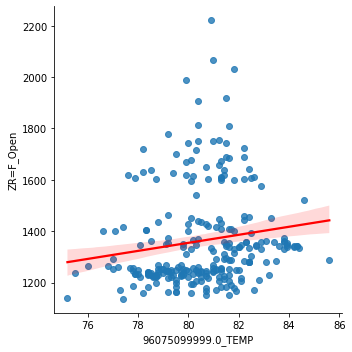

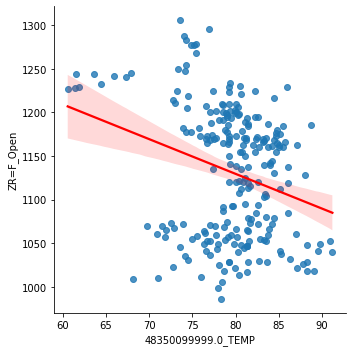

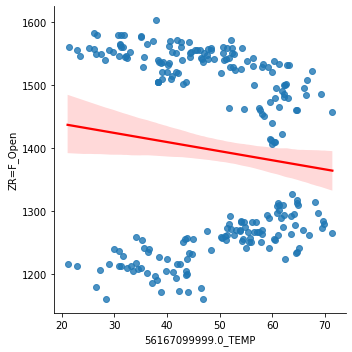

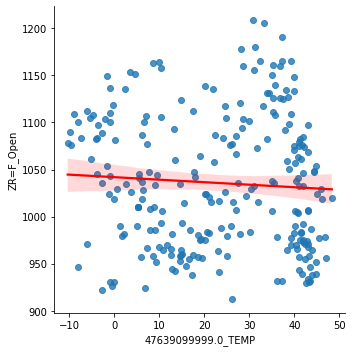

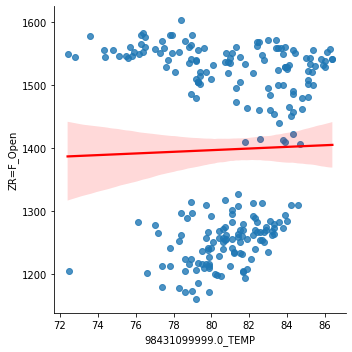

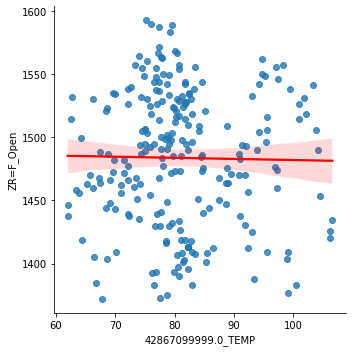

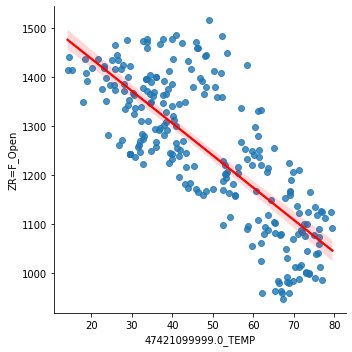

In [ ]:
n = 20
random_temperature_sample = np.random.choice(temperature_cols, n, replace=False)
[sns.lmplot(x=col, y='ZR=F_Open', data=data, fit_reg=True, line_kws={'color': 'red'}, height=5) for col in tqdm(random_temperature_sample)]
plt.show()

#### Other Weather Variable Graphs

Works just like First n Weather Variables.


> Simply input any of the weather variable arrays in weather_variables into weather_variable


> Note that 999.99, 9999.99, and 99.99 can all mean that data is missing. If points are clustered about those x-values, it is likely those data are missing.





  0%|          | 0/20 [00:00<?, ?it/s]

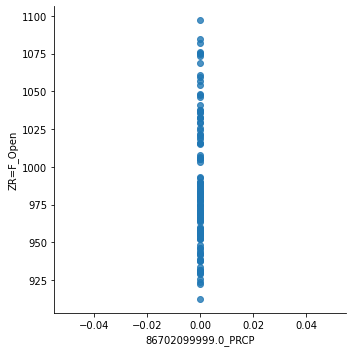

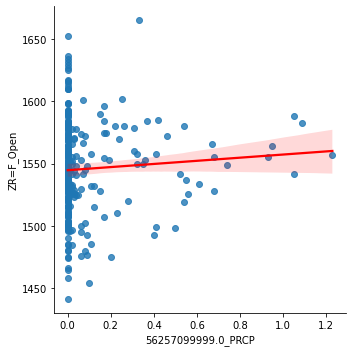

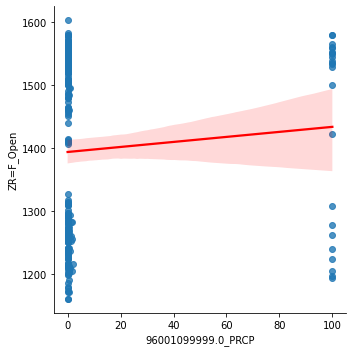

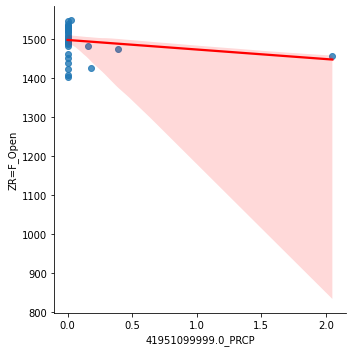

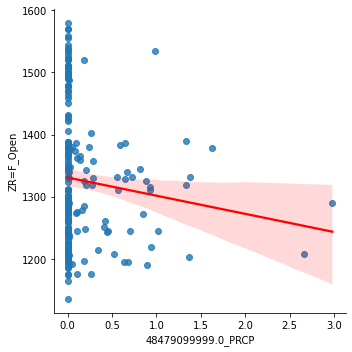

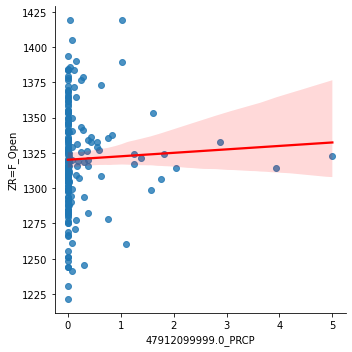

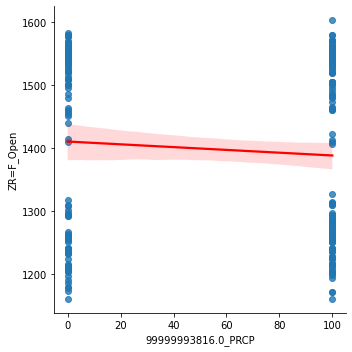

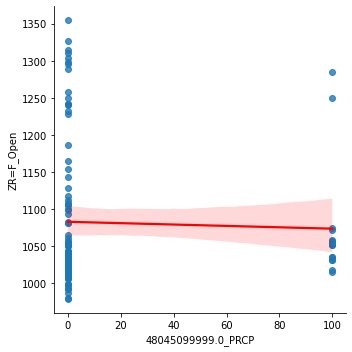

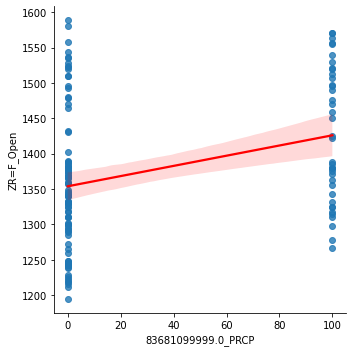

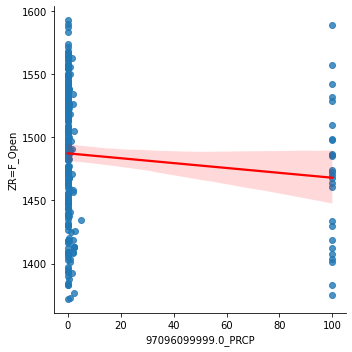

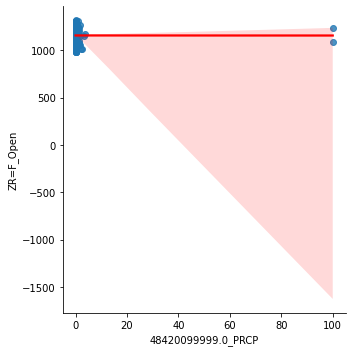

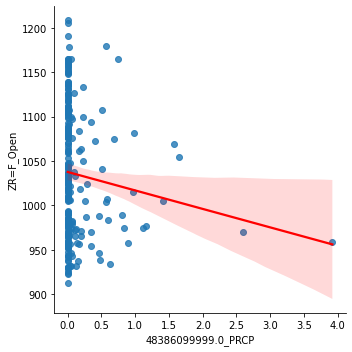

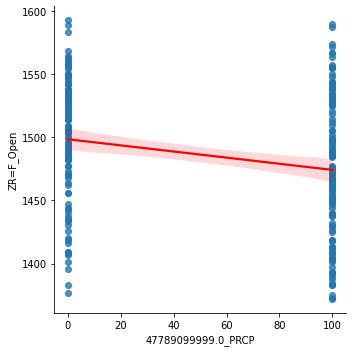

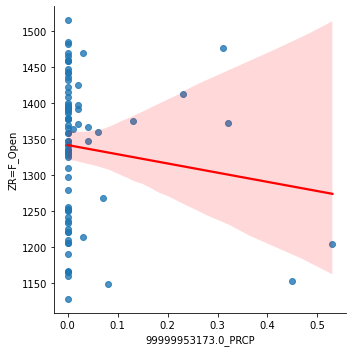

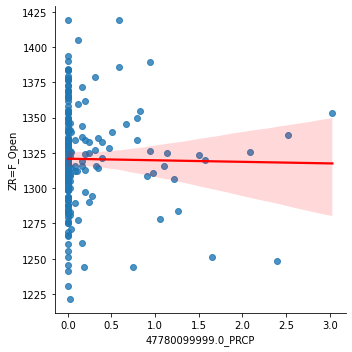

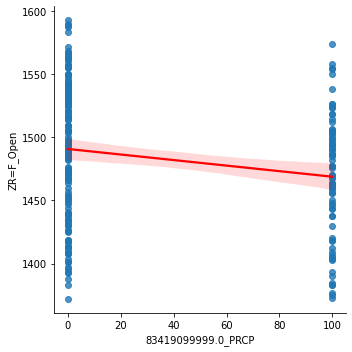

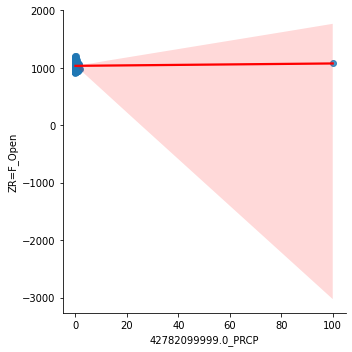

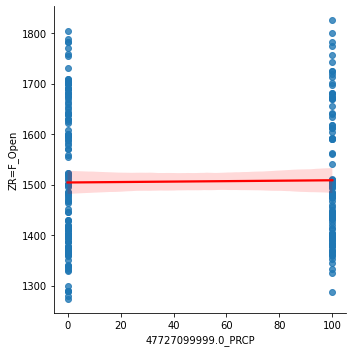

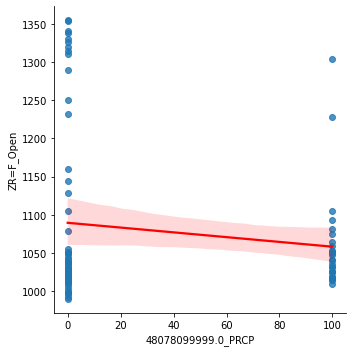

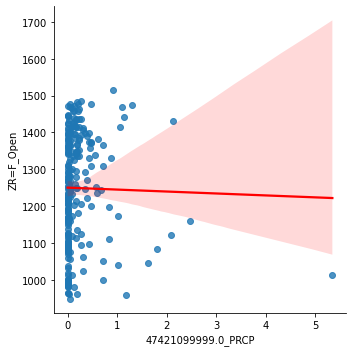

In [ ]:
weather_variables = [
  temperature_cols,
  dew_point_cols,
  mean_sea_level_pressure_cols,
  mean_visibility_cols,
  mean_wind_speed_cols,
  max_wind_speed_cols,
  max_temp_cols,
  min_temp_cols,
  precipitation_cols,
  snow_depth_cols,
]

weather_variable = precipitation_cols
n = 20 # number of random samples to plot 

random_sample = np.random.choice(weather_variable, n, replace=False)

[sns.lmplot(x=col, y='ZR=F_Open', data=data, fit_reg=True, line_kws={'color': 'red'}, height=5) for col in tqdm(random_sample)]
plt.show()

####Avg of All Temperature Columns in data

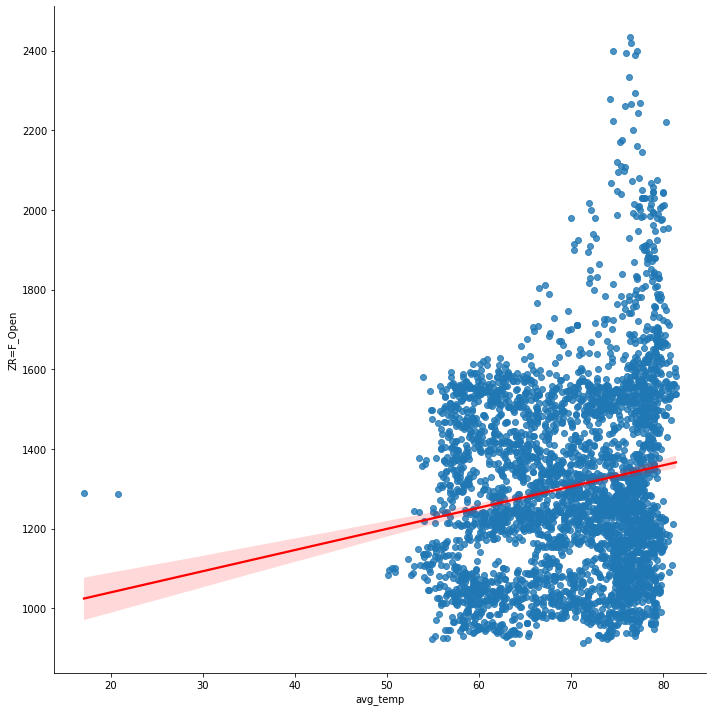

In [ ]:
sns.lmplot(x='avg_temp', y='ZR=F_Open', data=data.assign(avg_temp=all_temperature_average), fit_reg=True, line_kws={'color': 'red'}, height=10)

## Pearson Correlation for All Data 

In [ ]:
data_corr = data_floats.corr('pearson')

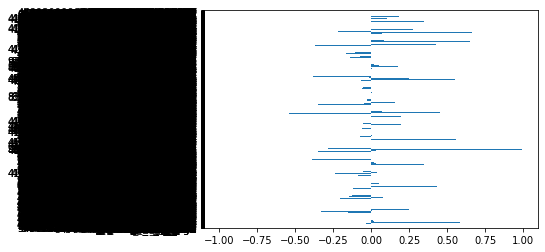

In [ ]:
data_corr.loc['ZR=F_Open'].plot(kind='barh')

In [ ]:
data

,ZR=F_Open,ZR=F_High,ZR=F_Low,ZR=F_Close,ZR=F_Adj_Close,ZR=F_Volume,CL=F_Open,CL=F_High,CL=F_Low,CL=F_Close,CL=F_Adj_Close,CL=F_Volume,ZW=F_Open,ZW=F_High,ZW=F_Low,ZW=F_Close,ZW=F_Adj_Close,ZW=F_Volume,59211099999_STATION,59211099999.0_LATITUDE,59211099999.0_LONGITUDE,59211099999.0_ELEVATION,59211099999.0_NAME,59211099999.0_TEMP,59211099999.0_TEMP_ATTRIBUTES,59211099999.0_DEWP,59211099999.0_DEWP_ATTRIBUTES,59211099999.0_SLP,59211099999.0_SLP_ATTRIBUTES,59211099999.0_STP,59211099999.0_STP_ATTRIBUTES,59211099999.0_VISIB,59211099999.0_VISIB_ATTRIBUTES,59211099999.0_WDSP,59211099999.0_WDSP_ATTRIBUTES,59211099999.0_MXSPD,59211099999.0_GUST,59211099999.0_MAX,59211099999.0_MAX_ATTRIBUTES,59211099999.0_MIN,...,47818099999.0_VISIB_ATTRIBUTES.1,47818099999.0_WDSP.1,47818099999.0_WDSP_ATTRIBUTES.1,47818099999.0_MXSPD.1,47818099999.0_GUST.1,47818099999.0_MAX.1,47818099999.0_MAX_ATTRIBUTES.1,47818099999.0_MIN.1,47818099999.0_MIN_ATTRIBUTES.1,47818099999.0_PRCP.1,47818099999.0_PRCP_ATTRIBUTES.1,47818099999.0_SNDP.1,47818099999.0_FRSHTT.1,47912099999_STATION,47912099999.0_LATITUDE,47912099999.0_LONGITUDE,47912099999.0_ELEVATION,47912099999.0_NAME,47912099999.0_TEMP,47912099999.0_TEMP_ATTRIBUTES,47912099999.0_DEWP,47912099999.0_DEWP_ATTRIBUTES,47912099999.0_SLP,47912099999.0_SLP_ATTRIBUTES,47912099999.0_STP,47912099999.0_STP_ATTRIBUTES,47912099999.0_VISIB,47912099999.0_VISIB_ATTRIBUTES,47912099999.0_WDSP,47912099999.0_WDSP_ATTRIBUTES,47912099999.0_MXSPD,47912099999.0_GUST,47912099999.0_MAX,47912099999.0_MAX_ATTRIBUTES,47912099999.0_MIN,47912099999.0_MIN_ATTRIBUTES,47912099999.0_PRCP,47912099999.0_PRCP_ATTRIBUTES,47912099999.0_SNDP,47912099999.0_FRSHTT
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2007-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.921110e+10,23.9,106.6,177.0,"BAISE, CH",58.9,8.0,54.8,8.0,1016.8,8.0,996.0,4.0,1.6,8.0,1.7,8.0,1.9,999.9,61.9,,55.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-02,1013.0,1013.0,1013.0,1013.0,1013.0,5.0,60.98,61.55,60.41,61.05,61.05,41686.0,NaN,NaN,NaN,NaN,NaN,NaN,5.921110e+10,23.9,106.6,177.0,"BAISE, CH",61.0,8.0,56.5,8.0,1014.8,8.0,993.8,4.0,3.6,8.0,4.1,8.0,7.8,999.9,66.4,,55.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-03,1016.0,1016.0,1016.0,1016.0,1016.0,10.0,60.95,60.97,57.72,58.32,58.32,248547.0,493.0,493.75,476.25,476.50,476.50,22414.0,5.921110e+10,23.9,106.6,177.0,"BAISE, CH",53.7,8.0,46.7,8.0,1021.1,8.0,999.5,4.0,13.1,8.0,2.7,8.0,3.9,999.9,57.9,,48.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-04,1018.0,1018.0,1018.0,1018.0,1018.0,14.0,58.35,58.58,55.39,55.59,55.59,324010.0,478.0,479.75,464.50,467.50,467.50,15557.0,5.921110e+10,23.9,106.6,177.0,"BAISE, CH",51.4,8.0,46.2,8.0,1025.3,8.0,3.8,4.0,6.0,8.0,2.2,8.0,3.9,999.9,55.0,,47.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-05,1020.0,1021.0,1019.5,1021.0,1021.0,32.0,55.41,56.40,54.90,56.31,56.31,250130.0,469.0,470.75,462.00,470.25,470.25,19820.0,5.921110e+10,23.9,106.6,177.0,"BAISE, CH",54.8,8.0,40.0,8.0,1027.4,8.0,5.9,4.0,10.5,8.0,2.7,8.0,5.8,999.9,60.4,,49.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...